# Intel DevCloud

## Cuenta en DevCloud
* El [Intel® DevCloud for oneAPI](https://devcloud.intel.com/oneapi/) es un espacio de desarrollo **gratuito** para que la comunidad de desarrolladores puedan programar aplicaciones. Instrucciones para [solicitud de cuenta](transparencias/DevCloud_Setup_New_Users.pdf)
    * Múltiples **hw**: 
        * **CPUs**: desktop *i9-11900* y servidor tipo Xeon diferentes arquitecturas (Skylake,  Ice Lake, Sapphire Rapids)
        * **GPUs**: integradas UHD Intel® Core™ Gen9 y Gen11 
        * **FPGAs**: Arria 10 y Stratix 10
    * **sw**: oneAPI divididos en [Toolkits](https://www.intel.com/content/www/us/en/developer/tools/oneapi/toolkits.html#gs.pd8yyt)
        * Compiladores: C/C++ y Fortran
        * Herramientas de perfilado: VTune, Advisor, GDB
        * Librerías optimizadas: oneMKL, oneDPL, oneVPL, oneDNN...
* Solicitud de cuenta gratuita [rellenando formulario](https://www.intel.com/content/www/us/en/forms/idz/devcloud-registration.html?tgt=https://www.intel.com/content/www/us/en/secure/forms/devcloud-enrollment/account-provisioning.html)
    * o bien en la web del [Intel® DevCloud for oneAPI](https://devcloud.intel.com/oneapi/) en la opción **Enroll**
    * **Importante** usar correo de UCM porque tiene una duración de uso mayor
    * Se recibirá un correo electrónico con instrucciones de uso

![Imagen](../figures/devcloud_enroll.png)

## Conexión a DevCloud
* Existen varios mecanismos de [conexión al Intel DevCloud](https://devcloud.intel.com/oneapi/documentation/connect-with-ssh-linux-macos/)

![Imagen](../figures/devcloud_connect.png)

* La más sencilla es abrir un cuaderno de Jupyter
    1. Una vez logeado en la web del [Intel® DevCloud for oneAPI](https://devcloud.intel.com/oneapi/) en la opción **Sign In** (esquina superior derecha)
    2. Ir a la opción **"Get Started"** en la banda superior azul
    3. Clicar sobre **"Launch JupyterLab"** en la parte inferior izquierda o en el [atajo](https://jupyter.oneapi.devcloud.intel.com/hub/login?next=/lab/tree/Welcome.ipynb?reset)

![Imagen](../figures/devcloud-launch_jupyperlab.png)


## Sistema de colas
* El [Intel® DevCloud for oneAPI](https://devcloud.intel.com/oneapi/) dispone de un sistema de colas para poder ejecutar las tareas
* El lanzamiento de trabajo se realiza mediante [jobs](https://devcloud.intel.com/oneapi/documentation/job-submission/)
* Existen dos formas de utilizar un nodo GPU: interactivo o trabajo tipo batch
    * Para solicitar una sesión de forma interactiva con el comando qsub ```qsub -I -l nodes=1:gpu:ppn=2 -d .```
        * ```-l nodes=1:gpu:ppn=2``` asigna un nodo completo con GPU
        * ```-d``` indica que la sesión abierta en el nodo se realiza en el mismo directorio que el lanzamiento de qsub
    * En un lanzamiento de tipo batch el trabajo se encola hasta que hay un slot disponible. La sintaxis es ```qsub -l nodes=1:gpu:ppn=2 -d . job.sh```
        * Donde el script job.sh contiene la secuencia de órdenes a lanzar

Un ejemplo del fichero job.sh sería el siguiente donde se muestra la hora de comienzo del job y su hora de finalización:
```bash
#!/bin/bash

echo
echo start: $(date "+%y%m%d.%H%M%S.%3N")
echo

# TODO list

echo
echo stop:  $(date "+%y%m%d.%H%M%S.%3N")
echo
```

* Para conocer las colas disponibles en el Intel DevCloud se puede utilizar el comando **pbsnodes**. Con el siguiente comando se conocen las propiedades de los nodos existentes ``` pbsnodes | sort | grep properties```

* Para más información relacionada con el lanzamiento de trabajos en el DevCloud se puede consultar la [documentación](https://devcloud.intel.com/oneapi/documentation/job-submission/)


* Vamos a lanzar un trabajo en el sistema de colas, para ello:
   1. Vamos a crear un fichero **job.sh**
   2. Se va a lanzar el trabajo con el script **q**

In [ ]:
%%writefile lab/job.sh
#!/bin/bash

echo
echo start: $(date "+%y%m%d.%H%M%S.%3N")
echo

# TODO list

echo
echo stop:  $(date "+%y%m%d.%H%M%S.%3N")
echo


In [ ]:
#!python batch_k
! chmod 755 q; chmod 755 lab/job.sh; if [ -x "$(command -v qsub)" ]; then ./q lab/job.sh; else lab/job.sh; fi

# Jupyter Notebooks

## Cuadernos
* Python es uno de los lenguaje de programación más populares hoy en día
    * Se necesita un interprete para su ejecución 
    * Una de ellas es Spyder
* Otra opción es la de utilizar la aplicación de [**Jupyter Notebook**](https://jupyter.org/)
    * Ideal si apenas se tiene experiencia en el mundo de la programación... y más para comenzar a desarrollar aplicaciones de ML
    * Es una aplicación cliente servidor: **editas tu código a través de navegador web**

* Además, Jupyter permite desarrollar en otros lenguajes de programación: "C, Python, R y Julia"
    * Ventajas: al ejecutar el cuaderno Jupyter sin importar el lenguaje de programación

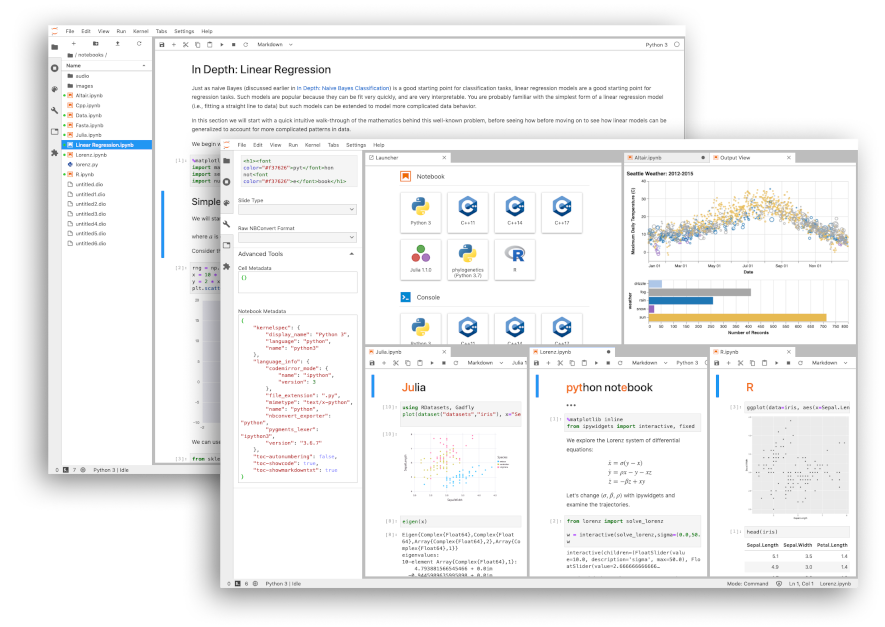


* Un cuaderno contiene
    * **Celdas**: código a ejecutar
    * **Texto**: texto con formato tipo Markdown
        * Texto formateado: negrita (este **texto** es equivalente a ```este **texto**```, cursiva...
        * Imágenes: Markdown es ```![nombre alternativo](dirección de la imagen)```
        * Enlaces: mediante el comando de markdown ```[texto](dirección del enlace)```
        * Fórmulas matemáticas: el código Latex suele estar soportado y en línea se puede insertar con símbolos del "dollar" ```$...$```

* Ventajas
    * El código está dividido en **celdas**
    * Facilita el desarrollo interactivo
    * Ideal para creación de modelos y explorar el funcionamiento con su análisis

### Celdas y ejecución
* En un cuaderno Jupyter existen celdas donde se aloja el código a ejecutar

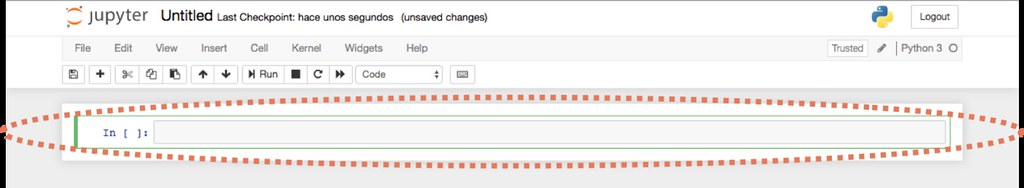

### Celdas mágicas
* ```%matplotlib inline``` añade los gráficos creados dinámicamente sobre el mismo cuaderno de jupyter
* ```%%timeit``` mide el tiempo que tarda en ejecutarse una celda
* ```%run filename.ipynb```  ejecuta el código de otro cuaderno jupyter

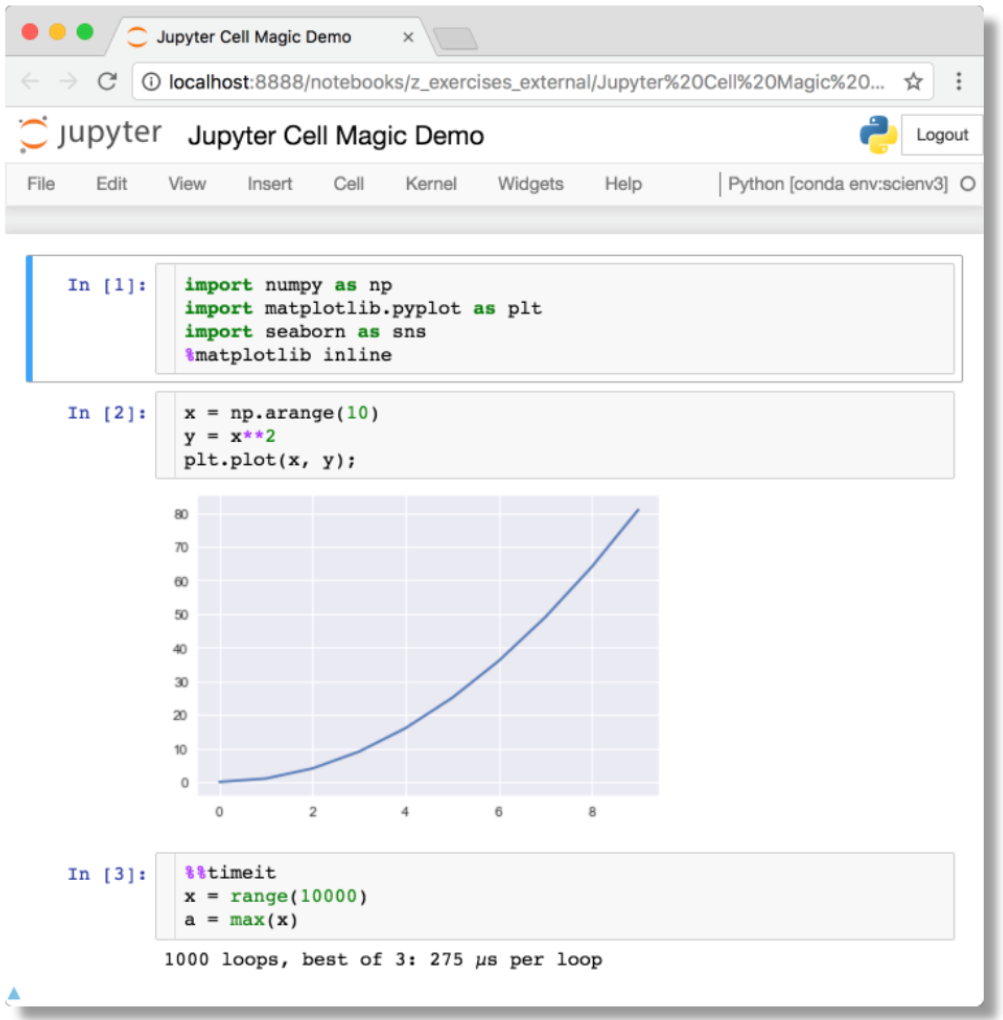

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(10)
y = x**2
plt.plot(x,y)

In [ ]:
%%timeit
x = np.random.rand(10000)
a = max(x)